<a href="https://colab.research.google.com/github/agnaldoseixas/BootCamp_Analise_Dados/blob/main/Atividade_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0 - Contexto

A empresa XPTO, atuante no setor de vendas de veículos seminovos, solicitou uma análise exploratória de seus dados de vendas. O objetivo é identificar padrões de consumo, tendências temporais, perfil dos clientes, desempenho por marca e formas de pagamento mais utilizadas. A partir disso, será possível embasar decisões estratégicas voltadas para otimização de vendas e melhor entendimento do mercado em que atua.

A base dados pode ser acessada no seguinte link: [Clique Aqui.](https://www.kaggle.com/datasets/fbarbosaoliveira/vendas-de-veculos-seminovos) No entanto, o arquivo também foi disponibilizado no Google Classroom.

**OBS:** Ao criar o DataFrame, atentem-se ao tipo de separador utilizado no arquivo, o ideal é abri-lo previamente para verificar qual está sendo usado.

# 1 - Questões Básicas (Manipulação de Dados)
## 1.1 - Exploração Inicial

* Quantos registros existem no dataset?

* Quais são as colunas disponíveis e seus tipos de dados?

* Existem valores nulos no dataset? Se sim, em quais colunas?

## 1.2 - Filtros Simples

* Quantos carros da marca Toyota foram vendidos?

* Liste todos os clientes do estado de São Paulo (SP).

* Quantas vendas foram realizadas para clientes do sexo feminino?

## 1.3 - Agregações Básicas

* Qual é o valor médio de venda dos veículos?

* Qual a marca com maior número de vendas?

* Qual é a idade média dos compradores?

# 2 - Questões Intermediárias (Análise mais Complexa)
## 2.1 - Análise Temporal (Opcional)

* Qual foi o mês com maior número de vendas?

* Qual o valor total vendido por ano?

* Houve crescimento nas vendas ao longo dos anos?

#### Dicas:

* Lembrem de converter a coluna para datetime.
* Para criar uma coluna AnoMes podem fazer o seguinte: df['AnoMes'] = df['Nome_Coluna'].dt.to_period('M')
* Para criar uma coluna apenas com o ano, podem fazer o seguinte: df['Ano'] = df['Nome_Coluna'].dt.year


## 2.2 - Segmentação

* Qual a forma de pagamento mais comum?

* Qual a média de valor de venda por estado?

* Qual a marca mais vendida para clientes com idade entre 30 e 40 anos?

## 2.3 - Correlações

* Existe relação entre a idade do comprador e o valor do veículo?

* Há diferença no valor médio de venda entre homens e mulheres?

* Qual a cor de veículo mais popular por marca?

# 3 - Questões Avançadas (Análises Complexas)
## 3.1 - Análise de Perfil

* Crie um perfil típico do comprador (idade, estado civil, estado) para cada marca.

* Qual forma de pagamento é mais comum em cada faixa etária?

## 3.2 - Visualização de Dados

### Crie gráficos que mostrem a distribuição de vendas por:

* Marca

* Estado

* Faixa etária

* Forma de pagamento

## 3.3 - Análise de Valor

* Quais são os 5 veículos mais caros vendidos?

#1 - Questões Básicas (Manipulação de Dados)

##1.1 - Exploração Inicial

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_loja = pd.read_csv('/content/vendas_loja_seminovos.csv', sep=';')
df_loja.head()

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista
1,2,Ester da Rocha,63,235.408.196-06,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio
2,3,Maria Luiza Nogueira,25,174.950.328-04,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista
3,4,Renan Novaes,19,245.367.890-65,Masculino,Casado,oliver50@example.com,+55 (021) 0411 4291,Guerra,MA,Honda,Fit,2020,Cinza,105843.27,2024-02-03,Financiamento
4,5,Manuela Novais,40,371.269.084-31,Feminino,Casado,tpinto@example.org,(011) 8890 3785,Castro de Minas,PI,Ford,Ka,2022,Cinza,66929.84,2019-06-29,Financiamento


In [ ]:
#Quantos registros existem no dataset?
df_loja.shape

(10950, 17)

In [ ]:
#Quais são as colunas disponíveis e seus tipos de dados?
df_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10950 non-null  int64  
 1   Nome Completo    10950 non-null  object 
 2   Idade            10950 non-null  int64  
 3   CPF              10950 non-null  object 
 4   Sexo             10950 non-null  object 
 5   Estado Civil     10950 non-null  object 
 6   E-mail           10950 non-null  object 
 7   Telefone         10950 non-null  object 
 8   Cidade           10950 non-null  object 
 9   Estado           10950 non-null  object 
 10  Marca            10950 non-null  object 
 11  Modelo           10950 non-null  object 
 12  Ano_fabricacao   10950 non-null  int64  
 13  Cor              10950 non-null  object 
 14  Valor_venda      10950 non-null  float64
 15  Data_venda       10950 non-null  object 
 16  Forma_pagamento  10950 non-null  object 
dtypes: float64(1

In [ ]:
#Existem valores nulos no dataset? Se sim, em quais colunas?
df_loja.isnull().sum()

,0
ID,0
Nome Completo,0
Idade,0
CPF,0
Sexo,0
Estado Civil,0
E-mail,0
Telefone,0
Cidade,0
Estado,0


##1.2 - Filtros Simples

In [ ]:
#Quantos carros da marca Toyota foram vendidos?
qtd_toyota = df_loja.query('Marca == "Toyota"').value_counts().sum()
print(f'Foram vendidos {qtd_toyota} carros da marca Toyota')
df_loja['Marca'].value_counts()

Foram vendidos 2178 carros da marca Toyota


,count
Marca,
Toyota,2178
Ford,1913
Peugeot,1666
Honda,1520
Volskwagen,1237
Fiat,906
Hyundai,640
Citroen,501
Chevrolet,311


In [ ]:
#Liste todos os clientes do estado de São Paulo (SP)
clientes_sp = df_loja.query('Estado == "SP"')[['Nome Completo', 'Cidade', 'Estado','Marca','Modelo']]
pd.set_option('display.max_rows', None)
clientes_sp

,Nome Completo,Cidade,Estado,Marca,Modelo
0,Luigi Silva,Azevedo de da Rosa,SP,Toyota,Yaris
21,Mariane Porto,Cavalcanti de Minas,SP,Volskwagen,T-Cross
42,Olívia Sá,da Rocha,SP,Toyota,Corolla Cross
88,Rafaela Fonseca,Castro,SP,Ford,Ranger
123,Isabel Martins,Fonseca,SP,Toyota,Camry
125,Cecilia Caldeira,Freitas,SP,Ford,Ranger
131,Ana Beatriz Melo,Gomes da Mata,SP,Toyota,Corolla
166,Stephany da Cunha,Farias,SP,Ford,Ka
218,Juan Moura,Freitas,SP,Honda,Civic
230,Vitória Sousa,Duarte Paulista,SP,Ford,Ka Sedan


In [ ]:
#Quantas vendas foram realizadas para clientes do sexo feminino?
qtd_feminino = df_loja.query('Sexo == "Feminino"').value_counts().sum()
print(f'Foram realizadas {qtd_feminino} vendas para clientes do sexo feminino')
df_loja['Sexo'].value_counts()

Foram realizadas 6814 vendas para clientes do sexo feminino


,count
Sexo,
Feminino,6814
Masculino,4136


##1.3 - Agregações Básicas

In [ ]:
#Qual é o valor médio de venda dos veículos?
v_medio = df_loja['Valor_venda'].mean()
f'O valor médio de vendas é de R$ {v_medio:,.2f}'.replace(',','X').replace('.',',').replace('X','.')
#df_loja['Valor_venda'].describe()

'O valor médio de vendas é de R$ 140.826,50'

In [ ]:
#Qual a marca com maior número de vendas?
df_loja['Marca'].value_counts().sort_values(ascending=False)

,count
Marca,
Toyota,2178
Ford,1913
Peugeot,1666
Honda,1520
Volskwagen,1237
Fiat,906
Hyundai,640
Citroen,501
Chevrolet,311


In [ ]:
#Qual é a idade média dos compradores?
i_media = df_loja['Idade'].mean()
print(f'A idade média dos compradores é de {i_media:.2f} anos')
#df_loja['Idade'].describe()

A idade média dos compradores é de 44.19 anos


#2 - Questões Intermediárias (Análise mais Complexa)

##2.1 - Análise Temporal (Opcional)

In [ ]:
#Lembrem de converter a coluna para datetime.
df_loja['Data_venda']=pd.to_datetime(df_loja['Data_venda'])

In [ ]:
df_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               10950 non-null  int64         
 1   Nome Completo    10950 non-null  object        
 2   Idade            10950 non-null  int64         
 3   CPF              10950 non-null  object        
 4   Sexo             10950 non-null  object        
 5   Estado Civil     10950 non-null  object        
 6   E-mail           10950 non-null  object        
 7   Telefone         10950 non-null  object        
 8   Cidade           10950 non-null  object        
 9   Estado           10950 non-null  object        
 10  Marca            10950 non-null  object        
 11  Modelo           10950 non-null  object        
 12  Ano_fabricacao   10950 non-null  int64         
 13  Cor              10950 non-null  object        
 14  Valor_venda      10950 non-null  float

In [ ]:
#criar uma coluna AnoMes
df_loja['AnoMes'] = df_loja['Data_venda'].dt.to_period('M')

In [ ]:
#criar uma coluna apenas com o ano
df_loja['Ano'] = df_loja['Data_venda'].dt.year

In [ ]:
df_loja.head()

,ID,Nome Completo,Idade,CPF,Sexo,Estado Civil,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento,AnoMes,Ano
0,1,Luigi Silva,53,910.623.485-24,Masculino,Viúvo,monteirovalentim@example.org,+55 21 0592 1284,Azevedo de da Rosa,SP,Toyota,Yaris,2021,Cinza,80028.52,2017-08-31,À vista,2017-08,2017
1,2,Ester da Rocha,63,235.408.196-06,Feminino,Solteiro,santoshenry@example.net,(084) 2407 2800,Costela,PR,Hyundai,HB20S,2016,Cinza,103668.13,2022-01-01,Consórcio,2022-01,2022
2,3,Maria Luiza Nogueira,25,174.950.328-04,Feminino,Solteiro,zgoncalves@example.net,+55 81 2567 8847,Sá Alegre,MG,Ford,Ecosport,2017,Preto,229867.69,2018-02-17,À vista,2018-02,2018
3,4,Renan Novaes,19,245.367.890-65,Masculino,Casado,oliver50@example.com,+55 (021) 0411 4291,Guerra,MA,Honda,Fit,2020,Cinza,105843.27,2024-02-03,Financiamento,2024-02,2024
4,5,Manuela Novais,40,371.269.084-31,Feminino,Casado,tpinto@example.org,(011) 8890 3785,Castro de Minas,PI,Ford,Ka,2022,Cinza,66929.84,2019-06-29,Financiamento,2019-06,2019


In [ ]:
#Qual foi o mês com maior número de vendas?
v_mes = df_loja['AnoMes'].value_counts().sort_values(ascending=False)
v_mes.head(10)

,count
AnoMes,
2019-07,139
2022-01,138
2018-01,135
2023-07,134
2022-12,134
2017-09,132
2022-10,131
2020-03,129
2019-10,127


In [ ]:
#Qual o valor total vendido por ano?
v_ano = df_loja.groupby('Ano')['Valor_venda'].sum().apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
v_ano

,Valor_venda
Ano,
2017,"R$ 134.666.514,56"
2018,"R$ 191.556.251,44"
2019,"R$ 189.537.530,85"
2020,"R$ 198.697.184,46"
2021,"R$ 188.274.977,14"
2022,"R$ 196.819.595,61"
2023,"R$ 193.397.740,18"
2024,"R$ 190.027.283,34"
2025,"R$ 59.073.061,97"


In [ ]:
#Houve crescimento nas vendas ao longo dos anos?

#Difrença
crescimento_numeric = df_loja.groupby('Ano')['Valor_venda'].sum().diff()

# Aplica a formatação
crescimento_formatado = crescimento_numeric.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Cria o DataFrame com ambas as colunas
crescimento = pd.DataFrame({
    'Diff Vendas Anual': crescimento_formatado,
    'Analise crescimento': ['Crescimento' if x > 0 else 'Decrescimento' for x in crescimento_numeric.values]
})

display(crescimento)

,Diff Vendas Anual,Analise crescimento
Ano,,
2017,R$ nan,Decrescimento
2018,"R$ 56.889.736,88",Crescimento
2019,"R$ -2.018.720,59",Decrescimento
2020,"R$ 9.159.653,61",Crescimento
2021,"R$ -10.422.207,32",Decrescimento
2022,"R$ 8.544.618,47",Crescimento
2023,"R$ -3.421.855,43",Decrescimento
2024,"R$ -3.370.456,84",Decrescimento
2025,"R$ -130.954.221,37",Decrescimento


In [ ]:
#Qual o valor total vendido por mes no ano de 2017
df_loja.query('Ano == 2017').groupby('AnoMes')['Valor_venda'].sum().apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

,Valor_venda
AnoMes,
2017-04,"R$ 7.512.830,25"
2017-05,"R$ 15.634.673,01"
2017-06,"R$ 16.549.751,99"
2017-07,"R$ 16.770.261,28"
2017-08,"R$ 16.308.021,65"
2017-09,"R$ 18.696.406,41"
2017-10,"R$ 13.037.822,81"
2017-11,"R$ 14.558.025,08"
2017-12,"R$ 15.598.722,08"


##2.2 - Segmentação

In [ ]:
#Qual a forma de pagamento mais comum?
df_loja['Forma_pagamento'].value_counts()

,count
Forma_pagamento,
Consórcio,3786
Financiamento,3576
À vista,3280
Leasing,308


In [ ]:
#Qual a média de valor de venda por estado?
v_media_estado = df_loja.groupby('Estado')['Valor_venda'].mean().apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
v_media_estado.sort_values(ascending=False)

,Valor_venda
Estado,
PR,"R$ 146.317,90"
RN,"R$ 146.051,37"
MS,"R$ 144.500,77"
AP,"R$ 144.193,66"
AL,"R$ 143.969,61"
MA,"R$ 143.803,72"
RR,"R$ 143.754,55"
SC,"R$ 143.541,21"
MT,"R$ 143.394,76"


In [ ]:
#Qual a marca mais vendida para clientes com idade entre 30 e 40 anos?
v_marca_idade = df_loja.query('Idade >= 30 and Idade <= 40').groupby('Marca')['Marca'].count().sort_values(ascending=False)
v_marca_idade

,Marca
Marca,
Toyota,418
Ford,401
Peugeot,342
Honda,316
Volskwagen,240
Fiat,198
Hyundai,134
Citroen,124
Chevrolet,63


##2.3 - Correlações

In [ ]:
#Existe relação entre a idade do comprador e o valor do veículo?
limites = [18, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
df_loja['Faixa_idade'] = pd.cut(df_loja['Idade'], bins=limites, labels=labels, right=False)
rel_idade_valor = df_loja.groupby('Faixa_idade', observed=True)['Valor_venda'].mean().apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
display(rel_idade_valor)

,Valor_venda
Faixa_idade,
18-19,"R$ 139.561,09"
20-29,"R$ 141.825,73"
30-39,"R$ 141.146,81"
40-49,"R$ 139.551,55"
50-59,"R$ 140.070,01"
60-69,"R$ 142.076,33"
70-79,"R$ 138.021,23"


In [ ]:
#Há diferença no valor médio de venda entre homens e mulheres?
v_media_sexo = df_loja.groupby('Sexo')['Valor_venda'].mean().apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
v_media_sexo

,Valor_venda
Sexo,
Feminino,"R$ 140.809,35"
Masculino,"R$ 140.854,75"


In [ ]:
#Qual a cor de veículo mais popular por marca?
popular = df_loja.pivot_table(index='Marca', columns='Cor', values='Valor_venda', aggfunc='count', fill_value=0)
display(popular)


Cor,Azul,Branco,Cinza,Prata,Preto,Verde,Vermelho
Marca,,,,,,,
Chevrolet,18,65,67,36,44,27,54
Citroen,29,119,97,49,74,45,88
Fiat,51,182,203,118,130,88,134
Ford,114,421,380,254,246,184,314
Honda,81,330,308,209,211,157,224
Hyundai,33,143,121,87,82,61,113
Jeep,1,17,11,17,12,8,12
Peugeot,84,379,312,220,209,170,292
Toyota,132,415,468,278,279,225,381


#3 - Questões Avançadas (Análises Complexas)

##3.1 - Análise de Perfil

In [ ]:
df_loja.columns

Index(['ID', 'Nome Completo', 'Idade', 'CPF', 'Sexo', 'Estado Civil', 'E-mail',
       'Telefone', 'Cidade', 'Estado', 'Marca', 'Modelo', 'Ano_fabricacao',
       'Cor', 'Valor_venda', 'Data_venda', 'Forma_pagamento', 'AnoMes', 'Ano',
       'Faixa_idade'],
      dtype='object')

In [ ]:
# Crie um perfil típico do comprador (idade, estado civil, estado) para cada marca.
perfil_comprador = df_loja.groupby('Marca').agg(
    idade_media=('Idade', lambda x: round(x.mean(), 2)),
    estado_civil_mais_comum=('Estado Civil', lambda x: x.mode()[0] if not x.mode().empty else 'NaN'),
    estado_mais_comum=('Estado', lambda x: x.mode()[0] if not x.mode().empty else 'NaN')
).reset_index()

display(perfil_comprador)


,Marca,idade_media,estado_civil_mais_comum,estado_mais_comum
0,Chevrolet,43.74,Casado,SC
1,Citroen,42.87,Divorciado,RO
2,Fiat,44.70,Solteiro,PA
3,Ford,44.04,Casado,AP
4,Honda,44.59,Solteiro,RR
5,Hyundai,44.42,Divorciado,PB
6,Jeep,46.50,Divorciado,MA
7,Peugeot,43.56,Divorciado,PB
8,Toyota,44.38,Casado,SC
9,Volskwagen,44.43,Divorciado,AL


In [ ]:
#Qual forma de pagamento é mais comum em cada faixa etária?
limites = [18, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['18-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
df_loja['Faixa_idade'] = pd.cut(df_loja['Idade'], bins=limites, labels=labels, right=False)
f_pagamento = df_loja.groupby('Faixa_idade', observed=True)['Forma_pagamento'].value_counts()
display(f_pagamento)

Faixa_idade  Forma_pagamento
18-19        Consórcio          161
             À vista            128
             Financiamento      121
             Leasing              8
20-29        Consórcio          708
             Financiamento      664
             À vista            616
             Leasing             63
30-39        Consórcio          718
             Financiamento      660
             À vista            607
             Leasing             65
40-49        Consórcio          707
             Financiamento      635
             À vista            627
             Leasing             57
50-59        Consórcio          724
             Financiamento      694
             À vista            624
             Leasing             45
60-69        Financiamento      726
             Consórcio          689
             À vista            615
             Leasing             63
70-79        Consórcio           79
             Financiamento       76
             À vista             63
             Leasing              7
Name: count, dtype: int64

##3.2 - Visualização de Dados

In [ ]:
'''
Crie gráficos que mostrem a distribuição de vendas por:
Marca

Estado

Faixa etária

Forma de pagamento
'''

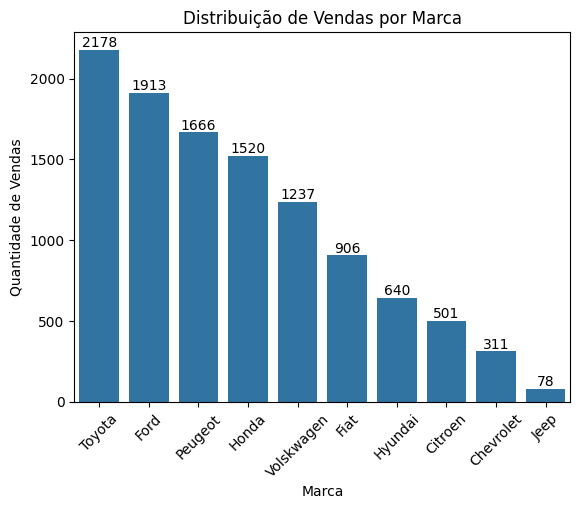

In [ ]:
#Crie gráficos que mostrem a distribuição de vendas por: Marca

sns.countplot(x='Marca',
              data=df_loja,
              order=df_loja['Marca'].value_counts().index)
plt.bar_label(plt.gca().containers[0], fmt='%d')
plt.title('Distribuição de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()

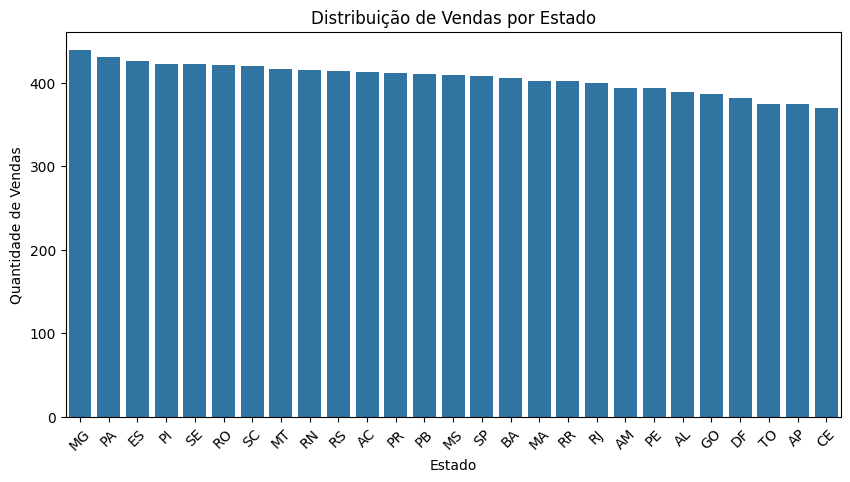

In [ ]:
#Crie gráficos que mostrem a distribuição de vendas por: Estado
plt.figure(figsize=(10,5))
sns.countplot(x='Estado',
              data=df_loja,
              order=df_loja['Estado'].value_counts().index)

plt.title('Distribuição de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()

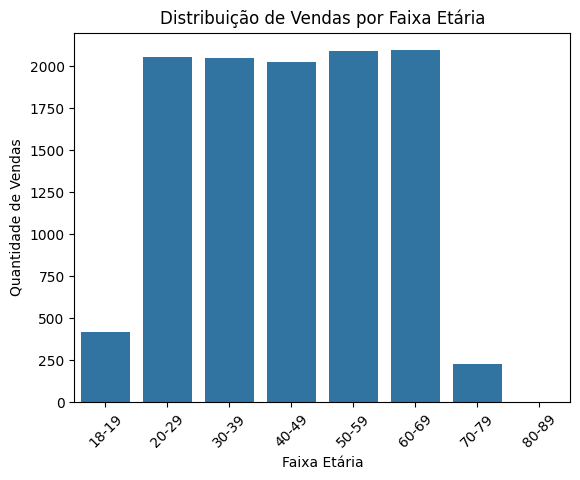

In [ ]:
#Crie gráficos que mostrem a distribuição de vendas por: Faixa Etaria

sns.countplot(x='Faixa_idade',  data=df_loja)

plt.title('Distribuição de Vendas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()

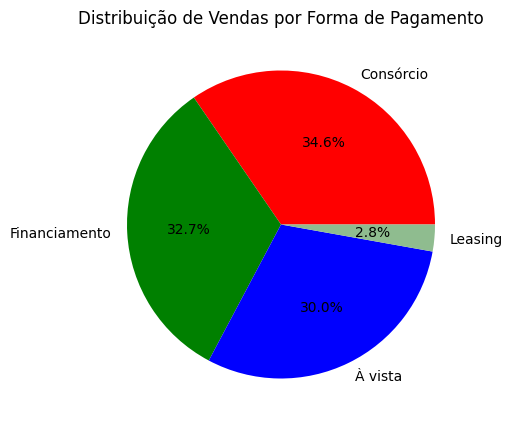

In [ ]:
#Crie gráficos que mostrem a distribuição de vendas por: Forma de pagamento
plt.figure(figsize=(10,5))
df_loja['Forma_pagamento'].value_counts().plot(kind='pie',
                                          autopct = '%1.1f%%',
                                          colors=['#FF0000','#008000','#0000FF','#8FBC8F'],
                                          ylabel='')
plt.title('Distribuição de Vendas por Forma de Pagamento')
plt.show()

##3.3 - Análise de Valor

In [ ]:
#Quais são os 5 veículos mais caros vendidos?

carros = df_loja['Modelo'].value_counts().head(5)
carros

,count
Modelo,
Corolla,390
Camry,365
Corolla Cross,362
Hilux,362
Etios,354
